In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

2022-11-10 19:59:19.355053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 19:59:19.605358: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-10 19:59:19.691305: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 19:59:20.901973: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

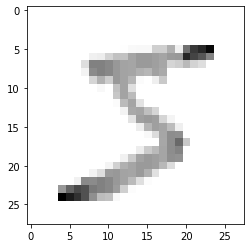

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

2022-11-10 19:59:36.831360: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 19:59:36.928497: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-11-10 19:59:36.928789: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-10 19:59:36.931311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9248
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1047 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0701 - accuracy: 0.9777


In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 817us/step - loss: 0.0906 - accuracy: 0.9707
0.09058070927858353 0.9707000255584717


In [6]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [7]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [8]:
predictions = new_model.predict([x_test])
print(predictions)

313/313 [==============================] - 0s 849us/step
[[8.70758243e-10 2.50235246e-07 4.84155726e-06 ... 9.99915540e-01
  3.45925201e-07 5.61155844e-07]
 [1.13418566e-10 1.38160785e-05 9.99981582e-01 ... 1.84881745e-08
  2.55979344e-08 4.36580589e-12]
 [6.81371901e-08 9.99401927e-01 9.37996333e-07 ... 3.24311004e-05
  5.24498522e-04 1.30390447e-06]
 ...
 [1.83402893e-08 6.69520296e-06 3.14220685e-08 ... 1.46323318e-05
  2.07233243e-05 1.44788675e-04]
 [9.47681144e-07 1.89626618e-07 2.29189936e-07 ... 5.18308752e-07
  5.43674047e-04 4.90998957e-08]
 [8.29798955e-06 2.71208080e-07 1.60392517e-06 ... 5.85439697e-09
  1.05502686e-05 1.09134312e-07]]


In [9]:
import numpy as np
print(np.argmax(predictions[1]))

2


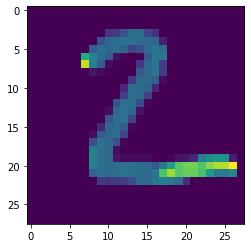

In [10]:
plt.imshow(x_test[1])
plt.show()